In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from scipy.stats import norm, skew, skewnorm, boxcox
from sklearn.preprocessing import PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt

# Observações gerais

- Em muitos casos, mais de uma função de transformação pode atingir o mesmo objetivo
- Os intervalos de assimetria são meras simplificações para facilitar o entendimento
- Outras funções como (*e.g.* tan, exp) também podem ser usadas

# Assimetria (Skewness)

- $skewness = 0$: Normalmente distribuida (ou perfeitamente simétrica)
- $skewness > 0$: Maior concentração na calda esquerda da distribuição (Negativa)
- $skewness < 0$: Maior concentração na calda direita da distribuição (Positiva)

<table>
    <thead>
        <tr>
            <th width="200px">Intervalos</th>
            <th>Descrição</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>$[-0.5, 0.5]$</td>
            <td>Aproximadamente simétrica</td>
        </tr>
        <tr>
            <td>$[-1.0,-0.5]$ ou $[0.5,1.0]$</td>
            <td>Moderadamente assimétrica</td>
        </tr>
        <tr>
            <td>$[-∞,-1.0]$ ou $[1.0,∞]$</td>
            <td>Altamente assimétrica</td>
        </tr>
    </tbody>
</table>

In [2]:
normal = np.random.normal(loc=0, scale=1, size=1000)

low_pos = skewnorm.rvs(a=1, loc=0, scale=1, size=1000)
low_neg = skewnorm.rvs(a=-1, loc=0, scale=1, size=1000)

mid_pos = skewnorm.rvs(a=3, loc=0, scale=1, size=1000)
mid_neg = skewnorm.rvs(a=-3, loc=0, scale=1, size=1000)

high_pos = skewnorm.rvs(a=20, loc=0, scale=1, size=1000)
high_neg = skewnorm.rvs(a=-20, loc=0, scale=1, size=1000)

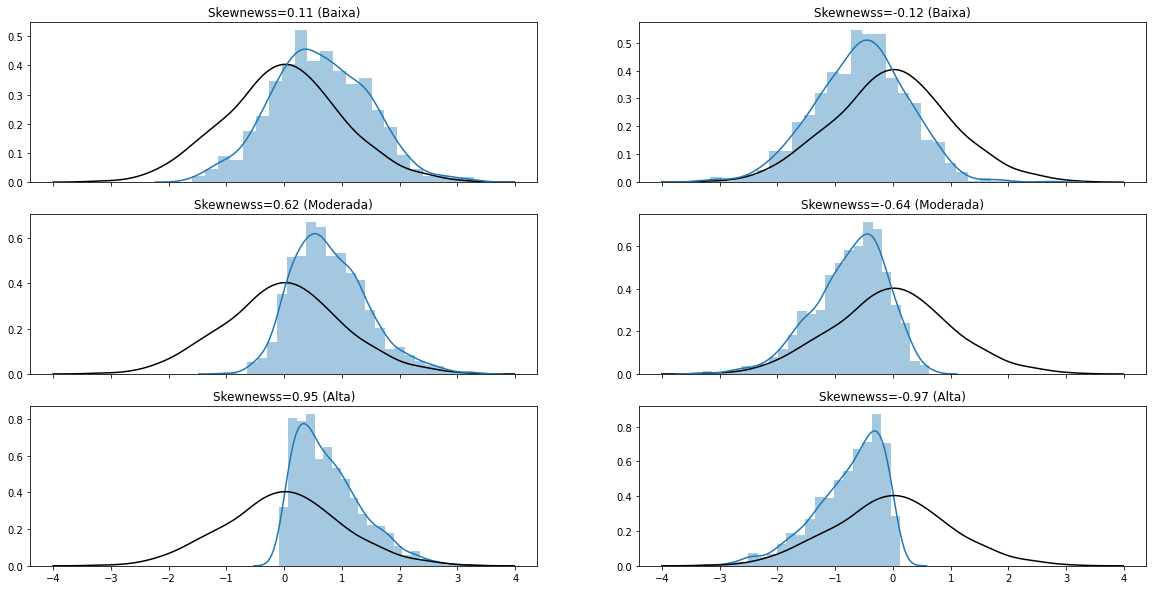

In [3]:
_, axs = plt.subplots(3, 2, figsize=(20, 10), sharex=True)

axs[0,0].set_title('Skewnewss={:.2f} (Baixa)'.format(skew(low_pos)))
sns.distplot(normal, ax=axs[0,0], hist=False, color='black')
sns.distplot(low_pos, ax=axs[0,0])

axs[0,1].set_title('Skewnewss={:.2f} (Baixa)'.format(skew(low_neg)))
sns.distplot(normal, ax=axs[0,1], hist=False, color='black')
sns.distplot(low_neg, ax=axs[0,1])

axs[1,0].set_title('Skewnewss={:.2f} (Moderada)'.format(skew(mid_pos)))
sns.distplot(normal, ax=axs[1,0], hist=False, color='black')
sns.distplot(mid_pos, ax=axs[1,0])

axs[1,1].set_title('Skewnewss={:.2f} (Moderada)'.format(skew(mid_neg)))
sns.distplot(normal, ax=axs[1,1], hist=False, color='black')
sns.distplot(mid_neg, ax=axs[1,1])


axs[2,0].set_title('Skewnewss={:.2f} (Alta)'.format(skew(high_pos)))
sns.distplot(high_pos, ax=axs[2,0])
sns.distplot(normal, ax=axs[2,0], hist=False, color='black')

axs[2,1].set_title('Skewnewss={:.2f} (Alta)'.format(skew(high_neg)))
sns.distplot(high_neg, ax=axs[2,1])
sns.distplot(normal, ax=axs[2,1], hist=False, color='black')

plt.show()

# Transformações

<table>
    <thead>
        <tr>
            <th width="100px">Nível</th>
            <th width="150px">Assimetria Positiva</th>
            <th width="200px">Assimetria Negativa</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Baixa</td>
            <td>$\sqrt{x + c}$</td>
            <td>$\sqrt{\max(x+c) - x}$</td>
        </tr>
        <tr>
            <td>Moderada</td>
            <td>$log_{10}~x + c$</td>
            <td>$log_{10}~{\max(x+c) - x}$</td>
        </tr>
        <tr>
            <td>Alta</td>
            <td>$\frac{1}{x + c}$</td>
            <td>$\frac{1}{\max(x+c) - x}$</td>
        </tr>
    </tbody>
</table>

In [4]:
low_pos_tf = np.sqrt(low_pos + 5)
low_neg_tf = np.sqrt(max(low_neg + 20) - low_neg)

mid_pos_tf = np.log10(mid_pos + 5)
mid_neg_tf = np.log10(max(mid_neg + 1) - mid_neg)

high_pos_tf = 1 / (high_pos + 2)
high_neg_tf = 1 / (max(high_neg + 1) - high_neg)

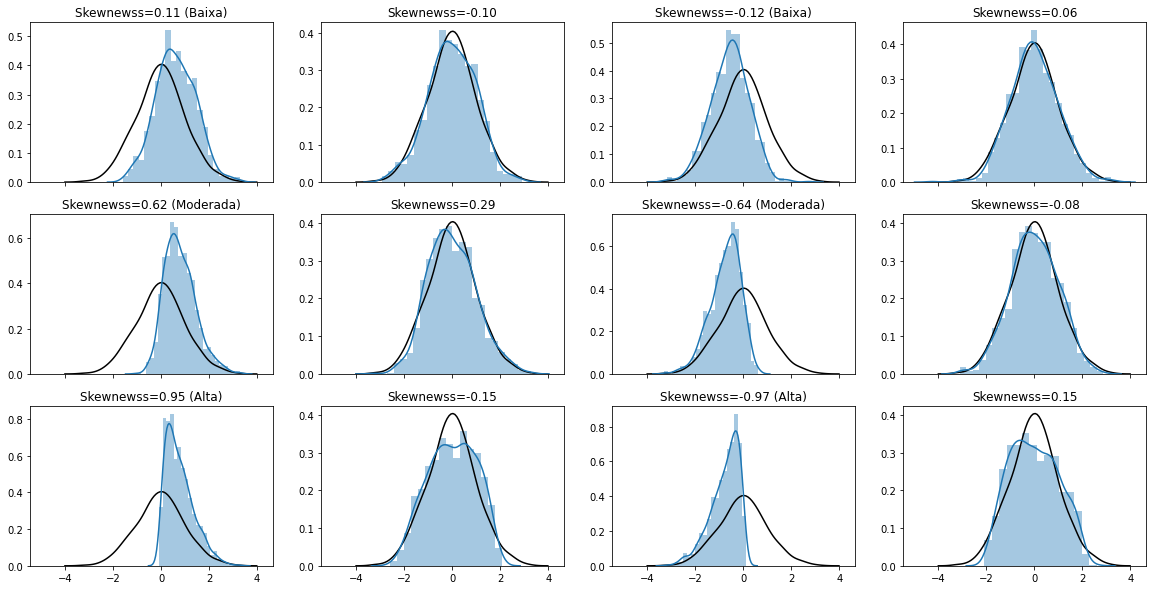

In [5]:
_, axs = plt.subplots(3, 4, figsize=(20, 10), sharex=True)

# Positiva
axs[0,0].set_title('Skewnewss={:.2f} (Baixa)'.format(skew(low_pos)))
sns.distplot(normal, ax=axs[0,0], hist=False, color='black')
sns.distplot(low_pos, ax=axs[0,0])

axs[0,1].set_title('Skewnewss={:.2f}'.format(skew(low_pos_tf)))
sns.distplot(normal, ax=axs[0,1], hist=False, color='black')
sns.distplot(scale(low_pos_tf), ax=axs[0,1])

axs[1,0].set_title('Skewnewss={:.2f} (Moderada)'.format(skew(mid_pos)))
sns.distplot(normal, ax=axs[1,0], hist=False, color='black')
sns.distplot(mid_pos, ax=axs[1,0])

axs[1,1].set_title('Skewnewss={:.2f}'.format(skew(mid_pos_tf)))
sns.distplot(normal, ax=axs[1,1], hist=False, color='black')
sns.distplot(scale(mid_pos_tf), ax=axs[1,1])

axs[2,0].set_title('Skewnewss={:.2f} (Alta)'.format(skew(high_pos)))
sns.distplot(normal, ax=axs[2,0], hist=False, color='black')
sns.distplot(high_pos, ax=axs[2,0])

axs[2,1].set_title('Skewnewss={:.2f}'.format(skew(high_pos_tf)))
sns.distplot(normal, ax=axs[2,1], hist=False, color='black')
sns.distplot(scale(high_pos_tf), ax=axs[2,1])


# Negativa

axs[0,2].set_title('Skewnewss={:.2f} (Baixa)'.format(skew(low_neg)))
sns.distplot(normal, ax=axs[0,2], hist=False, color='black')
sns.distplot(low_neg, ax=axs[0,2])

axs[0,3].set_title('Skewnewss={:.2f}'.format(skew(low_neg_tf)))
sns.distplot(normal, ax=axs[0,3], hist=False, color='black')
sns.distplot(scale(low_neg_tf), ax=axs[0,3])

axs[1,2].set_title('Skewnewss={:.2f} (Moderada)'.format(skew(mid_neg)))
sns.distplot(normal, ax=axs[1,2], hist=False, color='black')
sns.distplot(mid_neg, ax=axs[1,2])

axs[1,3].set_title('Skewnewss={:.2f}'.format(skew(mid_neg_tf)))
sns.distplot(normal, ax=axs[1,3], hist=False, color='black')
sns.distplot(scale(mid_neg_tf), ax=axs[1,3])

axs[2,2].set_title('Skewnewss={:.2f} (Alta)'.format(skew(high_neg)))
sns.distplot(normal, ax=axs[2,2], hist=False, color='black')
sns.distplot(high_neg, ax=axs[2,2])

axs[2,3].set_title('Skewnewss={:.2f}'.format(skew(high_neg_tf)))
sns.distplot(normal, ax=axs[2,3], hist=False, color='black')
sns.distplot(scale(high_neg_tf), ax=axs[2,3])

plt.show()

# Box-Cox

In [6]:
low_pos_tf, _ = boxcox(low_pos + max(low_pos) + 1)
low_neg_tf, _ = boxcox(low_neg + max(low_pos) + 1)

mid_pos_tf, _ = boxcox(mid_pos + max(low_pos) + 1)
mid_neg_tf, _ = boxcox(mid_neg + max(low_pos) + 1)

high_pos_tf, _ = boxcox(high_pos + max(low_pos) + 1)
high_neg_tf, _ = boxcox(high_neg + max(low_pos) + 1)

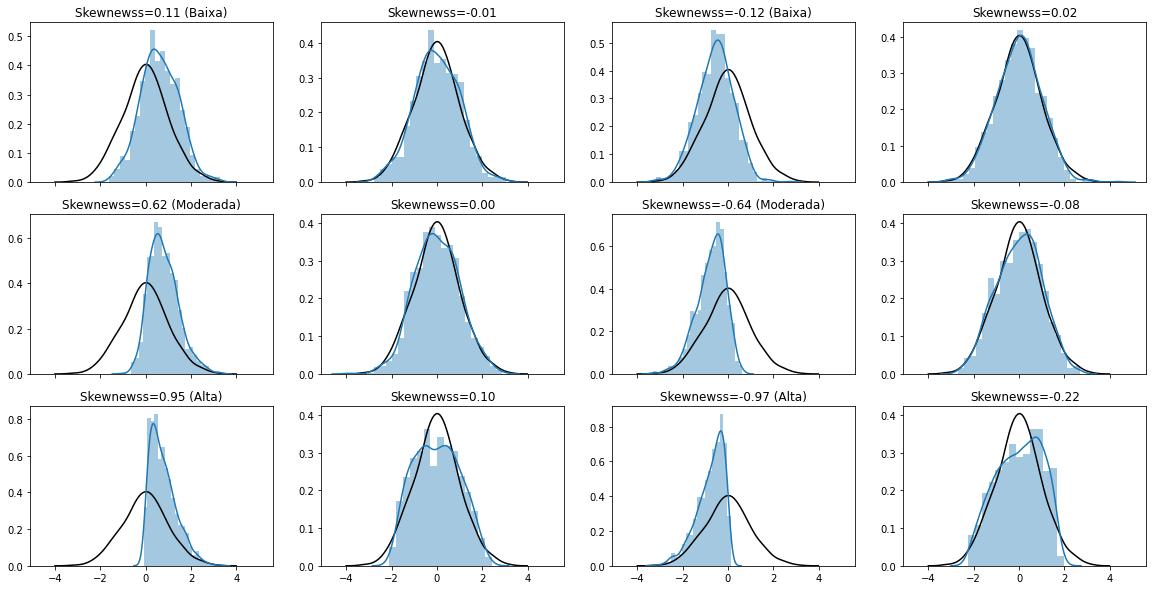

In [7]:
_, axs = plt.subplots(3, 4, figsize=(20, 10), sharex=True)

# Positiva
axs[0,0].set_title('Skewnewss={:.2f} (Baixa)'.format(skew(low_pos)))
sns.distplot(normal, ax=axs[0,0], hist=False, color='black')
sns.distplot(low_pos, ax=axs[0,0])

axs[0,1].set_title('Skewnewss={:.2f}'.format(skew(low_pos_tf)))
sns.distplot(normal, ax=axs[0,1], hist=False, color='black')
sns.distplot(scale(low_pos_tf), ax=axs[0,1])

axs[1,0].set_title('Skewnewss={:.2f} (Moderada)'.format(skew(mid_pos)))
sns.distplot(normal, ax=axs[1,0], hist=False, color='black')
sns.distplot(mid_pos, ax=axs[1,0])

axs[1,1].set_title('Skewnewss={:.2f}'.format(skew(mid_pos_tf)))
sns.distplot(normal, ax=axs[1,1], hist=False, color='black')
sns.distplot(scale(mid_pos_tf), ax=axs[1,1])

axs[2,0].set_title('Skewnewss={:.2f} (Alta)'.format(skew(high_pos)))
sns.distplot(normal, ax=axs[2,0], hist=False, color='black')
sns.distplot(high_pos, ax=axs[2,0])

axs[2,1].set_title('Skewnewss={:.2f}'.format(skew(high_pos_tf)))
sns.distplot(normal, ax=axs[2,1], hist=False, color='black')
sns.distplot(scale(high_pos_tf), ax=axs[2,1])


# Negativa

axs[0,2].set_title('Skewnewss={:.2f} (Baixa)'.format(skew(low_neg)))
sns.distplot(normal, ax=axs[0,2], hist=False, color='black')
sns.distplot(low_neg, ax=axs[0,2])

axs[0,3].set_title('Skewnewss={:.2f}'.format(skew(low_neg_tf)))
sns.distplot(normal, ax=axs[0,3], hist=False, color='black')
sns.distplot(scale(low_neg_tf), ax=axs[0,3])

axs[1,2].set_title('Skewnewss={:.2f} (Moderada)'.format(skew(mid_neg)))
sns.distplot(normal, ax=axs[1,2], hist=False, color='black')
sns.distplot(mid_neg, ax=axs[1,2])

axs[1,3].set_title('Skewnewss={:.2f}'.format(skew(mid_neg_tf)))
sns.distplot(normal, ax=axs[1,3], hist=False, color='black')
sns.distplot(scale(mid_neg_tf), ax=axs[1,3])

axs[2,2].set_title('Skewnewss={:.2f} (Alta)'.format(skew(high_neg)))
sns.distplot(normal, ax=axs[2,2], hist=False, color='black')
sns.distplot(high_neg, ax=axs[2,2])

axs[2,3].set_title('Skewnewss={:.2f}'.format(skew(high_neg_tf)))
sns.distplot(normal, ax=axs[2,3], hist=False, color='black')
sns.distplot(scale(high_neg_tf), ax=axs[2,3])

plt.show()

## PowerTransformer

In [8]:
df = pd.DataFrame({
    'low_pos': low_pos,
    'low_neg': low_neg,
    'mid_pos': mid_pos,
    'mid_neg': mid_neg,
    'high_pos': high_pos,
    'high_neg': high_neg
})

pf = PowerTransformer(method='yeo-johnson', standardize=True) # ou box-cox
df_tf = pf.fit_transform(df[df.columns])


low_pos_tf = df_tf[:,0]
low_neg_tf = df_tf[:, 1]

mid_pos_tf = df_tf[:, 2]
mid_neg_tf = df_tf[:, 3]

high_pos_tf = df_tf[:, 4]
high_neg_tf = df_tf[:, 5]

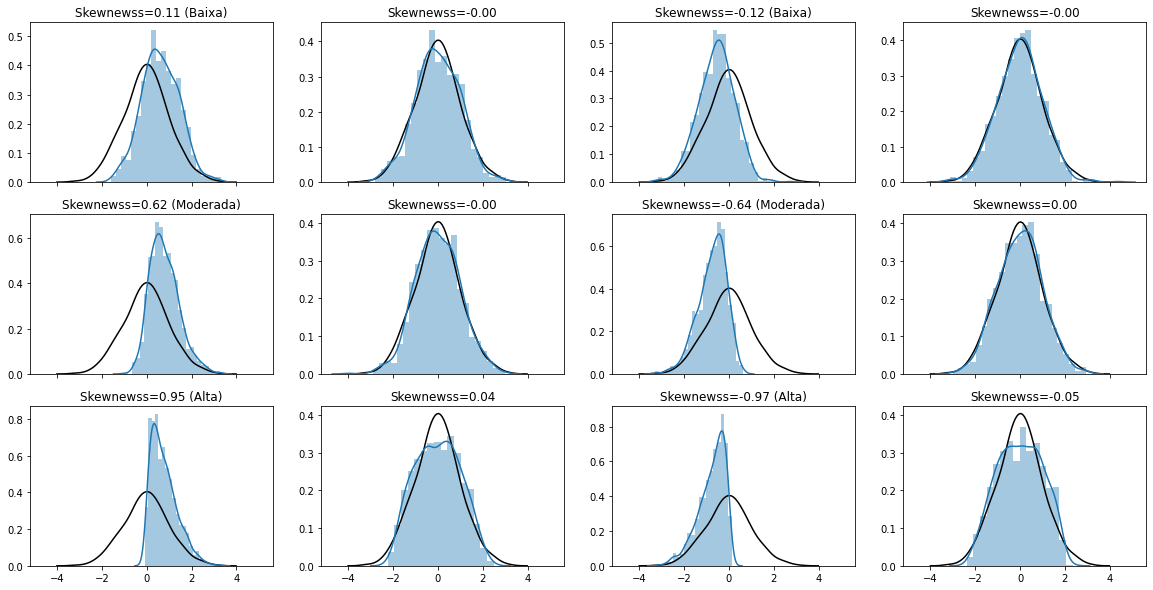

In [9]:
_, axs = plt.subplots(3, 4, figsize=(20, 10), sharex=True)

# Positiva
axs[0,0].set_title('Skewnewss={:.2f} (Baixa)'.format(skew(low_pos)))
sns.distplot(normal, ax=axs[0,0], hist=False, color='black')
sns.distplot(low_pos, ax=axs[0,0])

axs[0,1].set_title('Skewnewss={:.2f}'.format(skew(low_pos_tf)))
sns.distplot(normal, ax=axs[0,1], hist=False, color='black')
sns.distplot(scale(low_pos_tf), ax=axs[0,1])

axs[1,0].set_title('Skewnewss={:.2f} (Moderada)'.format(skew(mid_pos)))
sns.distplot(normal, ax=axs[1,0], hist=False, color='black')
sns.distplot(mid_pos, ax=axs[1,0])

axs[1,1].set_title('Skewnewss={:.2f}'.format(skew(mid_pos_tf)))
sns.distplot(normal, ax=axs[1,1], hist=False, color='black')
sns.distplot(scale(mid_pos_tf), ax=axs[1,1])

axs[2,0].set_title('Skewnewss={:.2f} (Alta)'.format(skew(high_pos)))
sns.distplot(normal, ax=axs[2,0], hist=False, color='black')
sns.distplot(high_pos, ax=axs[2,0])

axs[2,1].set_title('Skewnewss={:.2f}'.format(skew(high_pos_tf)))
sns.distplot(normal, ax=axs[2,1], hist=False, color='black')
sns.distplot(scale(high_pos_tf), ax=axs[2,1])


# Negativa

axs[0,2].set_title('Skewnewss={:.2f} (Baixa)'.format(skew(low_neg)))
sns.distplot(normal, ax=axs[0,2], hist=False, color='black')
sns.distplot(low_neg, ax=axs[0,2])

axs[0,3].set_title('Skewnewss={:.2f}'.format(skew(low_neg_tf)))
sns.distplot(normal, ax=axs[0,3], hist=False, color='black')
sns.distplot(scale(low_neg_tf), ax=axs[0,3])

axs[1,2].set_title('Skewnewss={:.2f} (Moderada)'.format(skew(mid_neg)))
sns.distplot(normal, ax=axs[1,2], hist=False, color='black')
sns.distplot(mid_neg, ax=axs[1,2])

axs[1,3].set_title('Skewnewss={:.2f}'.format(skew(mid_neg_tf)))
sns.distplot(normal, ax=axs[1,3], hist=False, color='black')
sns.distplot(scale(mid_neg_tf), ax=axs[1,3])

axs[2,2].set_title('Skewnewss={:.2f} (Alta)'.format(skew(high_neg)))
sns.distplot(normal, ax=axs[2,2], hist=False, color='black')
sns.distplot(high_neg, ax=axs[2,2])

axs[2,3].set_title('Skewnewss={:.2f}'.format(skew(high_neg_tf)))
sns.distplot(normal, ax=axs[2,3], hist=False, color='black')
sns.distplot(scale(high_neg_tf), ax=axs[2,3])

plt.show()

# Leitura Complementar

1. [Transform data to normal distribution](https://www.datanovia.com/en/lessons/transform-data-to-normal-distribution-in-r)
2. [Transforming skewed data](https://www.anatomisebiostats.com/biostatistics-blog/transforming-skewed-data)
3. [Boxcox transformation](https://www.statisticshowto.com/box-cox-transformation/)
4. [sklearn.preprocessing.PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)